# K Means Clustering Technique

Importing necessary packages

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Creating arrays

In [35]:
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])
mean = (10, 7)
cov = [[0.3, 0], [0, 0.3]]
#print(mean)

Generating a random sample of numbers

In [36]:
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
data_4 = np.random.multivariate_normal(mean, cov, 200)

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)
data.shape


(800, 2)

Creating a scatter plot of the data

Text(0, 0.5, '$x_2$')

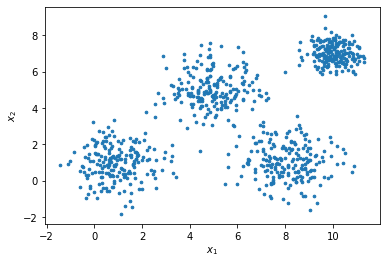

In [37]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Assiging the k value as 4

In [38]:
k = 4
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

print(c)
print(n)

2
800


Importing kmeans algorithm and plotting the graph

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
y_kmeans=kmeans.predict(data)

In [40]:
kmeans.cluster_centers_[:, 0]

array([ 8.10258644,  0.9306463 ,  4.92132051, 10.01352456])

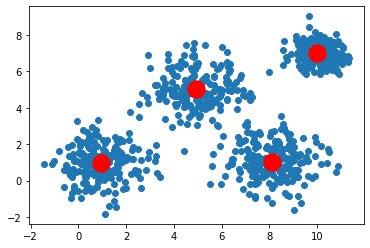

In [41]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [42]:
from sklearn.metrics import pairwise_distances_argmin
n_clusters=4

def find_clusters(data,n_clusters,rseed=3):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(data.shape[0])[:n_clusters]
    centers = data[i]
    while True:
        labels = pairwise_distances_argmin(data,centers)
        new_centers=np.array([data[labels ==i].mean(0) for i in range(n_clusters)])
    
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels
    
centers, labels = find_clusters(data,4)
    

print(labels)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

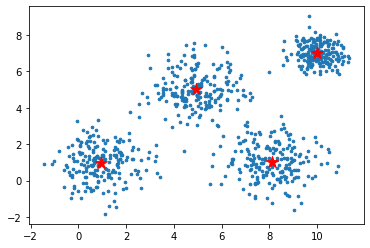

In [43]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='red', s=150)